### Итоговый контроль

#### Выполнил Демидович Никита Михайлович
Академическая группа: НКАбд-01-22

##### Задание №1

Напишите функцию, которая переводит градусы из шкалы Фаренгейта в шкалу Цельсия (и
обратно, с возможностью выбора направления конвертации). Входными данными могут быть
как единичные значения, так и векторы значений градусов. Программа должна возвращать
результат в виде таблицы данных, где в левом столбце указано(ы) значение(я) градусов в
исходном формате, а в правом столбце - в том формате, в который переводим.

In [3]:
convert_temperature <- function(temperature, direction = 'toC') {
  if (direction == "FtoC") {
    celsius <- (temperature - 32) * 5/9
    result <- data.frame(Fahrenheit = temperature, Celsius = celsius)
  } else if (direction == "CtoF") {
    fahrenheit <- temperature * 9/5 + 32
    result <- data.frame(Celsius = temperature, Fahrenheit = fahrenheit)
  } else {
    stop("Invalid direction. Please choose either 'FtoC' or 'CtoF'.")
  }

  return(result)
}

In [2]:
# Перевод из Фаренгейта в Цельсий
data <- convert_temperature(32, direction = "FtoC")
print(data)

# Перевод из Цельсия в Фаренгейт
data <- convert_temperature(0, direction = "CtoF")
print(data)

# Перевод вектора значений
temperatures <- c(32, 68, 100)
data <- convert_temperature(temperatures, direction = "CtoF")
print(data)

  Fahrenheit Celsius
1         32       0
  Celsius Fahrenheit
1       0         32
  Celsius Fahrenheit
1      32       89.6
2      68      154.4
3     100      212.0


##### Задание №2

In [ ]:
# 2.1

result <- 0
start_time <- Sys.time()
# Вычисление двойной суммы
for (i in 1:20) {
  for (j in 1:i) {
    result <- result + (i^4 / (3 + i + j))
  }
}

end_time <- Sys.time()
# Вывод результата
print(result)
cat("Время выполнения варианта 1: ", end_time - start_time, "\n")

#########################

#2.2

result <- 0
start_time <- Sys.time()

for (i in 1:20) {
  result <- result + sum(i^4 / (3 + i * seq(1, i)))
}

end_time <- Sys.time()

print(result)
cat("Время выполнения варианта 2: ", end_time - start_time, "\n")

##### Задание №3

Загрузите встроенную в R базу данных по автомобилям mtcars. С помощью библиотеки ggplot2 и постройте точечную диаграмму, которая:
- демонстрирует связь между показателями «число лошадиных сил» (hp) и «вес» (wt);
- учитывает информацию о числе цилиндров у автомобиля (cyl);
- учитывает информацию о типе коробки передач - автомат или механика (am); легенда графика должна быть корректной и информативной. Точки, соответствующие автомобилям с автоматической коробкой передач, должны быть зеленого цвета ("green"), а с ручной – красного ("red").
Подпишите оси графика. Добавьте заголовок графика.

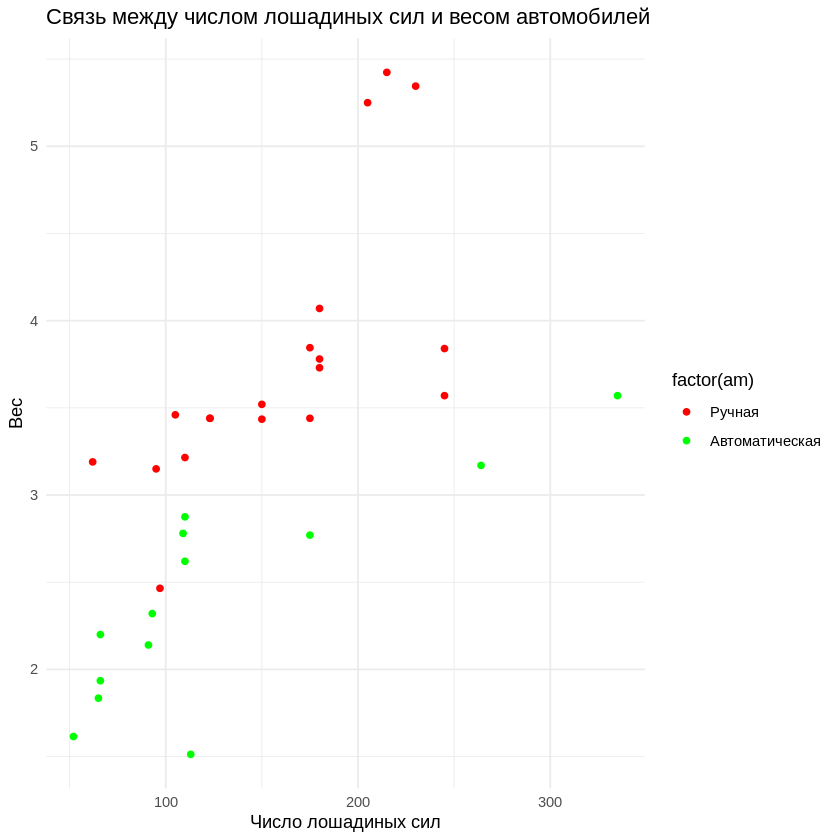

In [4]:
# Загрузка библиотеки ggplot2
library(ggplot2)
# Загрузка базы данных mtcars
data(mtcars)
# Установка цветов для автоматической и ручной коробки передач
colors <- c("red", "green")
# Построение точечной диаграммы
ggplot(mtcars, aes(x = hp, y = wt, color = factor(am))) +
  geom_point() +
  scale_color_manual(values = colors, labels = c("Ручная", "Автоматическая")) +
  labs(x = "Число лошадиных сил", y = "Вес", title = "Связь между числом лошадиных сил и весом автомобилей") +
  theme_minimal()

##### Задание №4

Напишите функцию, которая запрашивает у пользователя размерность матрицы (пользователь вводит в строке ввода число строк nrows и столбцов ncols через пробел), и создает единичную матрицу заданной размерности. Если невозможно создать единичную матрицу заданной размерности, на экран выводится соответствующее сообщение и создается нулевая матрица заданной размерности. Затем функция запрашивает у пользователя число элементов матрицы, которые нужно случайным образом выбрать и заменить на NA. Функция должна возвращать в итоге матрицу со случайным набором элементов NA, а также выводить на экран объем памяти, занимаемый данной матрицей.

In [5]:
create_matrix <- function() {
  sizes <- readline(prompt = "Введите размерность матрицы (через пробел): ")
  # Запрос размерности матрицы
  dims <- as.numeric(strsplit(sizes, " ")[[1]])
  
  nrows <- dims[1]
  ncols <- dims[2]
  
  # Создание единичной или нулевой матрицы
  if (nrows != ncols) { # Проверка
    print("Невозможно создать единичную матрицу заданной размерности!")
    matrix <- matrix(0, nrows, ncols)
   }
  else  if (nrows == ncols) {
    matrix <- diag(nrows)
    num_na <- as.numeric(readline(prompt = "Введите количество элементов, которые нужно заменить на NA: "))
  # Запрос количества элементов, которые нужно заменить на NA
    random_indices <- sample(1:(nrows * ncols), num_na)
    for (index in random_indices) {
      row <- (index - 1) %/% nrows + 1
      col <- (index - 1) %% ncols + 1
      matrix[row, col] <- NA
    }
  }
  
  print(matrix)
  print(object.size(matrix))
  
  return(matrix)
}
# Пример использование матрицы
result_matrix <- create_matrix()

Введите число строк и столбцов матрицы (через пробел): 3 3
Введите число элементов, которые нужно заменить на NA: 2


Warning message in matrix[unlist(dim(matrix))] <- `*vtmp*`:
“number of items to replace is not a multiple of replacement length”


Объем памяти, занимаемый матрицей:  0.000328064  MB 
     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1


##### Задание №5

Загрузите встроенную в R базу данных airquality. Удалите из таблицы данных все строки, содержащие значения NA. Для получившейся таблицы данных напишите код, который выводит на экран 2 самых жарких месяца, а затем выводит таблицу данных, состоящую только из наблюдений для этих двух месяцев.

In [6]:
# Загрузка базы данных airquality
data(airquality)
# Удаление строк с NA значениями
airquality_clean <- na.omit(airquality)
# Нахождение двух самых жарких месяцев
hottest_months <- head(aggregate(airquality_clean$Temp, by = list(airquality_clean$Month), FUN = max), 2)
# Вывод двух самых жарких месяцев
cat("Два самых жарких месяца:\n")
for (i in 1:nrow(hottest_months)) {
  cat(hottest_months[i, "Group.1"], "\n")
}
# Фильтрация таблицы данных для двух самых жарких месяцев
filtered_data <- subset(airquality_clean, Month %in% hottest_months$Group.1)
# Вывод таблицы данных для двух самых жарких месяцев
cat("\nТаблица данных для двух самых жарких месяцев:\n")
print(filtered_data)

Два самых жарких месяца:
5 
6 

Таблица данных для двух самых жарких месяцев:
   Ozone Solar.R Wind Temp Month Day
1     41     190  7.4   67     5   1
2     36     118  8.0   72     5   2
3     12     149 12.6   74     5   3
4     18     313 11.5   62     5   4
7     23     299  8.6   65     5   7
8     19      99 13.8   59     5   8
9      8      19 20.1   61     5   9
12    16     256  9.7   69     5  12
13    11     290  9.2   66     5  13
14    14     274 10.9   68     5  14
15    18      65 13.2   58     5  15
16    14     334 11.5   64     5  16
17    34     307 12.0   66     5  17
18     6      78 18.4   57     5  18
19    30     322 11.5   68     5  19
20    11      44  9.7   62     5  20
21     1       8  9.7   59     5  21
22    11     320 16.6   73     5  22
23     4      25  9.7   61     5  23
24    32      92 12.0   61     5  24
28    23      13 12.0   67     5  28
29    45     252 14.9   81     5  29
30   115     223  5.7   79     5  30
31    37     279  7.4   76     5  